In [41]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.no_of_iterations=0

In [42]:
import random
import numpy
import math
import time


    

def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    
    #Max_iter=1000
    #lb=-100
    #ub=100
    #dim=30  
    #SearchAgents_no=5
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=numpy.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=numpy.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=numpy.zeros(dim)
    Delta_score=float("inf")
    
    #Initialize the positions of search agents
    Positions=numpy.random.uniform(0,1,(SearchAgents_no,dim)) *(ub-lb)+lb
    
    Convergence_curve=numpy.zeros(Max_iter)
    s=solution()

     # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    s.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            Positions[i,:]=numpy.clip(Positions[i,:], lb, ub)

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2       
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
                
            
        
        
        Convergence_curve[l]=Alpha_score;

        """if (l%1==0):
               print(['At iteration '+ str(l)+ ' the best fitness is '+ str(Alpha_score)]);"""
    
    timerEnd=time.time()  
    s.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    s.executionTime=timerEnd-timerStart
    s.convergence=Convergence_curve
    s.optimizer="GWO"
    s.objfname=objf.__name__
    s.no_of_iterations=l
    
    
    
    
    return s

In [80]:
import numpy
import math
import numpy as np

import warnings
warnings.simplefilter('ignore')

# define the function blocks
def prod( it ):
    p= 1
    for n in it:
        p *= n
    return p

def Ufun(x,a,k,m):
    y=k*((x-a)**m)*(x>a)+k*((-x-a)**m)*(x<(-a));
    return y
    
def F1(x):
    s=numpy.sum(x**2);
    return s

def F2(x):
    o=numpy.sum(abs(x))+prod(abs(x));
    return o;     
           
def F3(x):
    dim=len(x)+1;
    o=0;
    for i in range(1,dim):
        o=o+(numpy.sum(x[0:i]))**2; 
    return o; 
    
def F4(x):
    o=max(abs(x));
    return o;     

def F5(x):
    dim=len(x);
    o=numpy.sum(100*(x[1:dim]-(x[0:dim-1]**2))**2+(x[0:dim-1]-1)**2);
    return o; 

def F6(x):
    o=numpy.sum(abs((x+.5))**2);
    return o;

def F7(x):
    dim=len(x);

    w=[i for i in range(len(x))]
    for i in range(0,dim):
        w[i]=i+1;
    o=numpy.sum(w*(x**4))+numpy.random.uniform(0,1);
    return o;

def F8(x):
    o=sum(-x*(numpy.sin(numpy.sqrt(abs(x)))));
    return o;

def F9(x):
    dim=len(x);
    o=numpy.sum(x**2-10*numpy.cos(2*math.pi*x))+10*dim;
    return o;


def F10(x):
    dim=len(x);
    o=-20*numpy.exp(-.2*numpy.sqrt(numpy.sum(x**2)/dim))-numpy.exp(numpy.sum(numpy.cos(2*math.pi*x))/dim)+20+numpy.exp(1);
    return o;

def F11(x):
    dim=len(x);
    w=[i for i in range(len(x))]
    w=[i+1 for i in w];
    o=numpy.sum(x**2)/4000-prod(numpy.cos(x/numpy.sqrt(w)))+1;   
    return o;
    
def F12(x):
    dim=len(x);
    o=(math.pi/dim)*(10*((numpy.sin(math.pi*(1+(x[0]+1)/4)))**2)+numpy.sum((((x[1:dim-1]+1)/4)**2)*(1+10*((numpy.sin(math.pi*(1+(x[1:dim-1]+1)/4))))**2))+((x[dim-1]+1)/4)**2)+numpy.sum(Ufun(x,10,100,4));   
    return o;
    
def F13(x): 
    dim=len(x);
    o=.1*((numpy.sin(3*math.pi*x[1]))**2+sum((x[0:dim-2]-1)**2*(1+(numpy.sin(3*math.pi*x[1:dim-1]))**2))+ 
    ((x[dim-1]-1)**2)*(1+(numpy.sin(2*math.pi*x[dim-1]))**2))+numpy.sum(Ufun(x,5,100,4));
    return o;
    
def F14(x): 
    aS=[[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]];     
    aS=numpy.asarray(aS);
    bS = numpy.zeros(25)
    v=numpy.matrix(x)
    for i in range(0,25):
        H=v-aS[:,i];
        bS[i]=numpy.sum((numpy.power(H,6)));   
    w=[i for i in range(25)]   
    for i in range(0,24):
        w[i]=i+1;
    o=((1./500)+numpy.sum(1./(w+bS)))**(-1);
    return o;  
     
def F15(L):  
    aK=[.1957,.1947,.1735,.16,.0844,.0627,.0456,.0342,.0323,.0235,.0246];
    bK=[.25,.5,1,2,4,6,8,10,12,14,16];
    aK=numpy.asarray(aK);
    bK=numpy.asarray(bK);
    bK = 1/bK;  
    fit=numpy.sum((aK-((L[0]*(bK**2+L[1]*bK))/(bK**2+L[2]*bK+L[3])))**2);
    return fit
def F16(L):  
    o=4*(L[0]**2)-2.1*(L[0]**4)+(L[0]**6)/3+L[0]*L[1]-4*(L[1]**2)+4*(L[1]**4);
    return o

def F17(L):  
    o=(L[1]-(L[0]**2)*5.1/(4*(numpy.pi**2))+5/numpy.pi*L[0]-6)**2+10*(1-1/(8*numpy.pi))*numpy.cos(L[0])+10;
    return o
    
def F18(L):  
    o=(1+(L[0]+L[1]+1)**2*(19-14*L[0]+3*(L[0]**2)-14*L[1]+6*L[0]*L[1]+3*L[1]**2))*(30+(2*L[0]-3*L[1])**2*(18-32*L[0]+12*(L[0]**2)+48*L[1]-36*L[0]*L[1]+27*(L[1]**2)));
    return o
# map the inputs to the function blocks
def F19(L):    
    aH=[[3,10,30],[.1,10,35],[3,10,30],[.1,10,35]];
    aH=numpy.asarray(aH);
    cH=[1,1.2,3,3.2];
    cH=numpy.asarray(cH);
    pH=[[.3689,.117,.2673],[.4699,.4387,.747],[.1091,.8732,.5547],[.03815,.5743,.8828]];
    pH=numpy.asarray(pH);
    o=0;
    for i in range(0,4):
        o=o-(numpy.dot(cH[i],(numpy.exp(-(numpy.sum(aH[i,:].dot((L-pH[i,:])**2)))))));   
    return o
    

def F20(L):    
    aH=[[10,3,17,3.5,1.7,8],[.05,10,17,.1,8,14],[3,3.5,1.7,10,17,8],[17,8,.05,10,.1,14]];
    aH=numpy.asarray(aH);
    cH=[1,1.2,3,3.2];
    cH=numpy.asarray(cH);
    pH=[[.1312,.1696,.5569,.0124,.8283,.5886],[.2329,.4135,.8307,.3736,.1004,.9991],[.2348,.1415,.3522,.2883,.3047,.6650],[.4047,.8828,.8732,.5743,.1091,.0381]];
    pH=numpy.asarray(pH);
    o=0;
    for i in range(0,4):
        o=o-cH[i]*numpy.exp(-(numpy.sum(aH[i,:].dot(((L-pH[i,:])**2)))));
    return o

def F21(L):
    aSH=[[4,4,4,4],[1,1,1,1],[8,8,8,8],[6,6,6,6],[3,7,3,7],[2,9,2,9],[5,5,3,3],[8,1,8,1],[6,2,6,2],[7,3.6,7,3.6]];
    cSH=[.1,.2,.2,.4,.4,.6,.3,.7,.5,.5];
    aSH=numpy.asarray(aSH);
    cSH=numpy.asarray(cSH);
    fit=0;
    for i in range(0,4):
        v=numpy.matrix(L-aSH[i,:])
        fit=fit-((v)*(v.T)+cSH[i])**(-1);
    o=fit.item(0);
    return o
  
def F22(L):
    aSH=[[4,4,4,4],[1,1,1,1],[8,8,8,8],[6,6,6,6],[3,7,3,7],[2,9,2,9],[5,5,3,3],[8,1,8,1],[6,2,6,2],[7,3.6,7,3.6]];
    cSH=[.1,.2,.2,.4,.4,.6,.3,.7,.5,.5];
    aSH=numpy.asarray(aSH);
    cSH=numpy.asarray(cSH);
    fit=0;
    for i in range(0,6):
        v=numpy.matrix(L-aSH[i,:])
        fit=fit-((v)*(v.T)+cSH[i])**(-1);
    o=fit.item(0);
    return o  

def F23(L):
    aSH=[[4,4,4,4],[1,1,1,1],[8,8,8,8],[6,6,6,6],[3,7,3,7],[2,9,2,9],[5,5,3,3],[8,1,8,1],[6,2,6,2],[7,3.6,7,3.6]];
    cSH=[.1,.2,.2,.4,.4,.6,.3,.7,.5,.5];
    aSH=numpy.asarray(aSH);
    cSH=numpy.asarray(cSH);
    fit=0;
    for i in range(0,9):
        v=numpy.matrix(L-aSH[i,:])
        fit=fit-((v)*(v.T)+cSH[i])**(-1);
    o=fit.item(0);
    return o 

def F66(x):
    dim=int(math.floor(len(x)/4))
    sum2=0
    for i in range(1,dim):
        sum2=(((x[4*i-3]+10*x[4*i-2])**2)+(5*(x[4*i-1]-x[4*i])**2)+((x[4*i-2]-x[4*i-1])**4)+(10*(x[4*i-3]-x[4*i])**4))
    return sum2

def F77(x):
    dim=len(x)
    dim=dim-2
    o=numpy.sum( (x[0:dim-1]+10*x[1:dim])**2 + 5*( (x[2:dim+1]-x[3:dim+2])**2) + (x[1:dim]-2*x[2:dim+1])**4 + 10*((x[0:dim-1]-x[3:dim+2])**4))
    return o 

def F1111(x):
    dim=len(x)
    o=numpy.sum(abs(x[1:dim]*np.sin( x[1:dim]+0.1*x[1:dim])))
    return o

def F1313(x):
    dim=len(x)
   
    o=numpy.sum(
        0.5+
        (
            ((numpy.sin(((100*(x[0:dim-1]**2))+(x[1:dim]**2))**0.5))**2)-0.5) 
        /(1+0.001*(x[:dim-1]**2-2*x[:dim-1]*x[1:dim]+x[1:dim]**2)**2))
    return o

def F88(x):
    dim=len(x)
    dim=dim-1
    o=numpy.sum( (   (   (x[1:dim-1])**2 )  ** (x[2:dim]**2 + 1) )+  (((x[2:dim])**2 ) ** (x[1:dim-1]*2+ 1)))
    return o




In [77]:
benchmarkFn=[F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F15,F16,F17,F18,F66,F77,F1313,F88,F1111]

In [78]:
def multiple(obj):
    egwo=[]
    for i in range(30):
        mm=GWO(objf=obj,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)
        egwo.append(mm.convergence[len(mm.convergence)-1])
    stdev=(statistics.stdev(egwo))
    return obj,sum(egwo)/30,stdev

In [79]:
import statistics

In [18]:
final=[]
for i in benchmarkFn:
    print("optimizing",i.__name__)
    final.append(multiple(i))
final

optimizing F1
optimizing F2
optimizing F3
optimizing F4
optimizing F5
optimizing F6
optimizing F7
optimizing F8
optimizing F9
optimizing F10
optimizing F11
optimizing F12
optimizing F13
optimizing F15
optimizing F16
optimizing F17
optimizing F18
optimizing F66
optimizing F77
optimizing F1313
optimizing F88


E:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:211: RuntimeWarning: overflow encountered in power


optimizing F1111


NameError: name 'np' is not defined

In [21]:
for i in final:
    print(i[2])

1.7925797330300997e-21
1.1810450334281084e-12
0.028985612367924938
2.2326341717590415e-05
0.5221741014017555
0.5995375134748703
0.002932895856938097
137.04569006559066
5.328372561299688
0.08443037763502916
0.014076134086176804
0.16181526563220744
0.30215824630147337
0.0004611672310833514
1.434212142089096e-07
0.18341352288663199
28.737107200820024
1.7337691168892957e-06
5.00777506635271e-09
0.5880611883512542
4.155875113311402e-22


In [27]:
a,b,c=multiple(F1111)
a,b,c

(<function __main__.F1111(x)>, 1.858235785412159, 7.096220703054936)

In [66]:
eegwo=GWO(objf=F11,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)
egwo=GWO(objf=F1,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)
egwo.no_of_iterations,egwo.convergence[len(egwo.convergence)-1]

(999, 2.675011152771112e-23)

In [48]:
eegwo.convergence[0]

744.6884840027665

In [28]:
import matplotlib.pyplot as plt

In [36]:
x1=[]
for i in range(1000):
    x1.append(i)
x1
y1=x1
y1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


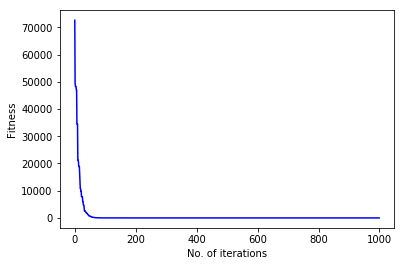

In [74]:
plt.plot(x1,egwo.convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("basic_f1.png")
plt.show()

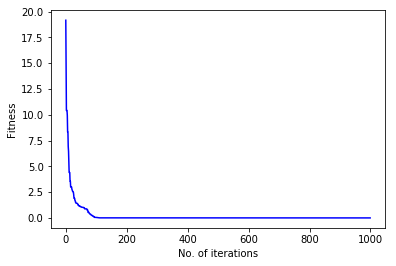

In [75]:
plt.plot(x1,eegwo.convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("basic_f11.png")
plt.show()

In [44]:
plt.savefig("basic_f1.png")

<Figure size 432x288 with 0 Axes>

In [73]:
for i in eegwo.convergence:
    print(i)

19.15306044286106
14.319915256939296
10.413942518276857
10.413942518276857
10.413942518276857
9.922480371251371
8.32159750265841
8.32159750265841
6.915413240065265
6.465440896353636
5.210441678000654
4.398551467648371
4.398551467648371
4.398551467648371
3.5475529081269572
3.5475529081269572
2.994341682664685
2.994341682664685
2.994341682664685
2.994341682664685
2.7812837862669832
2.7087733044674196
2.602224910777495
2.5473426890378805
2.5473426890378805
2.4692847893797643
2.233441180545264
1.8996750866980134
1.8996750866980134
1.8996750866980134
1.6995649331628946
1.661367863367062
1.510174005037823
1.510174005037823
1.4155024012520525
1.4155024012520525
1.4155024012520525
1.4155024012520525
1.406972746226181
1.3651249465686182
1.2695806429293317
1.2695806429293317
1.1804861940143025
1.1804861940143025
1.1804861940143025
1.1804861940143025
1.115822345502633
1.115822345502633
1.0957823849054664
1.0885613327024641
1.088407977866645
1.0457031855044003
1.0357210471622056
1.0349792901775616